In [9]:
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt

In [24]:
countries = ['DE', 'DK', 'PL']

# Input

In [10]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [45]:
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", usecols=[0, 3, 4], index_col=0)
    tmp.columns = ['engineering', 'disamenity']
    tmp['total'] = tmp['engineering'] + tmp['disamenity']
    tmp[c] = 2
    turbines = turbines.append(tmp)
    #tmp['total'].sort_values().reset_index(drop=True).plot()

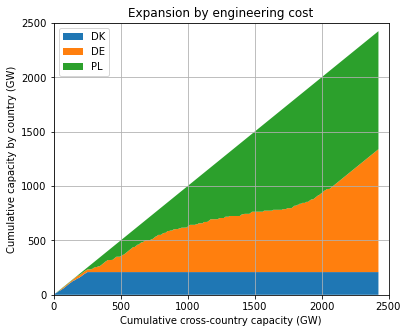

In [77]:
plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in ['DK', 'DE', 'PL']:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 2500)
plt.ylim(0, 2500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

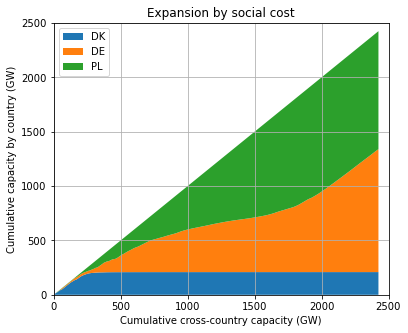

In [78]:
plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in ['DK', 'DE', 'PL']:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 2500)
plt.ylim(0, 2500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

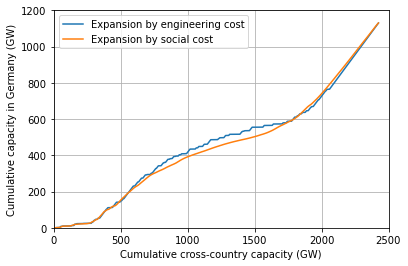

In [81]:
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 2500)
plt.ylim(0, 1200)
plt.grid()

In [52]:
tmp['DE']

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
1212452    1130.230
1212453    1130.232
1212454    1130.234
1212455    1130.236
1212456    1130.238
Name: DE, Length: 1212457, dtype: float64

# LCOE back of the envelope

In [12]:
afc = -numpy_financial.pmt(params['wacc'], params['lifetime'], params['invest'])

In [13]:
lcoe = (afc + params['cost_qfix']) / 2200
lcoe

41.49837919283222

# Plot

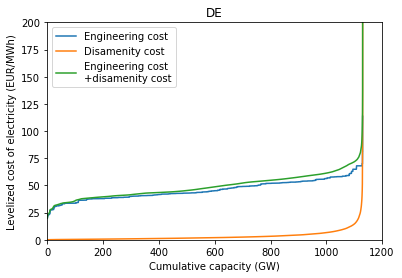

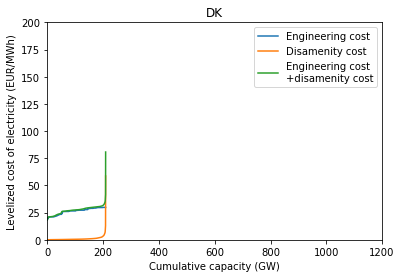

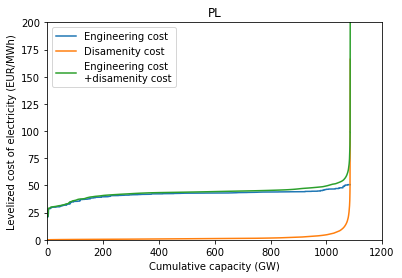

In [28]:
for c in countries:
    
    tmp = turbines[c]
    
    plt.figure()

    cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

    engineering_cost = tmp['engineering'].sort_values()
    plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

    disamenity_cost = tmp['disamenity'].sort_values()
    plt.plot(cumulative_capacity, disamenity_cost, label='Disamenity cost')

    total_cost = tmp['total'].sort_values()
    plt.plot(cumulative_capacity, total_cost, label='Engineering cost\n+disamenity cost')

    plt.xlabel('Cumulative capacity (GW)')
    plt.ylabel('Levelized cost of electricity (EUR/MWh)')
    plt.xlim(0, 1200)
    plt.ylim([0,200])

    plt.legend()
    plt.title(c)

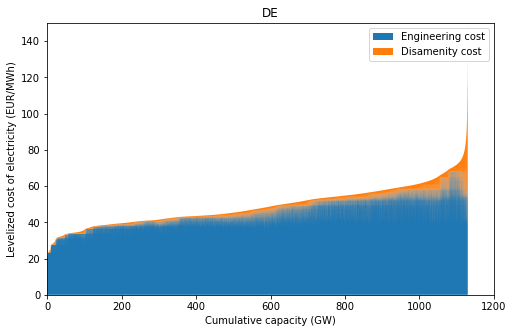

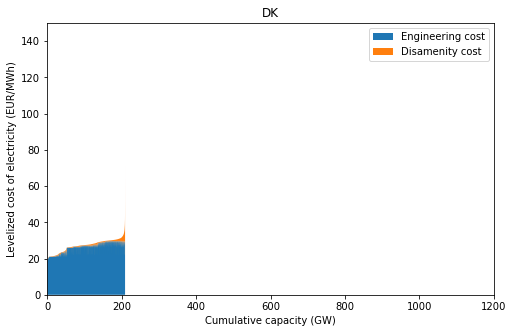

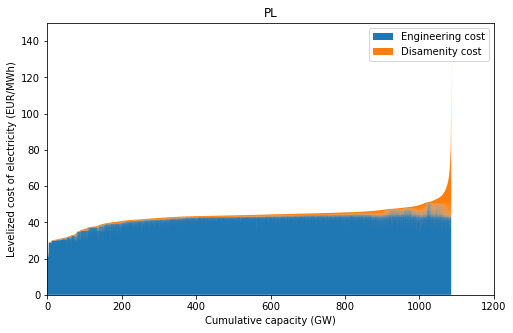

In [68]:
for c in countries:
    
    tmp = turbines[turbines[c]>0]
    
    plt.figure(figsize=[8,5])

    cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

    engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
    plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

    disamenity_cost = tmp.sort_values('total')['total']
    plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Disamenity cost')

    plt.xlabel('Cumulative capacity (GW)')
    plt.ylabel('Levelized cost of electricity (EUR/MWh)')
    plt.xlim(0, 1200)
    plt.ylim([0,150])

    plt.legend()
    plt.title(c)

In [65]:
turbines['DE']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
542839    NaN
542840    NaN
542841    NaN
542842    NaN
542843    NaN
Name: DE, Length: 1212457, dtype: float64

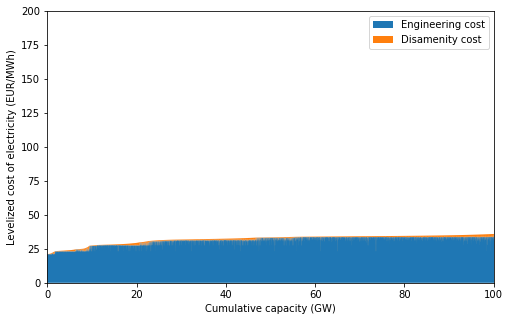

In [8]:
plt.figure(figsize=[8,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines.sort_values(['total', 'engineering'])['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = turbines.sort_values('total')['total']
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Disamenity cost')

#engineering_cost = turbines['disamenity_cost_eur_per_mwh'].sort_values()
#plt.plot(cumulative_capacity, engineering_cost, label='Disamenity cost')

#total_cost = (turbines['lcoe_eur_per_mwh'] + turbines['disamenity_cost_eur_per_mwh']).sort_values()
#plt.plot(cumulative_capacity, disamenity_cost, label='Engineering cost\n+disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim([0,200])

plt.legend()

(0.0, 20.0)

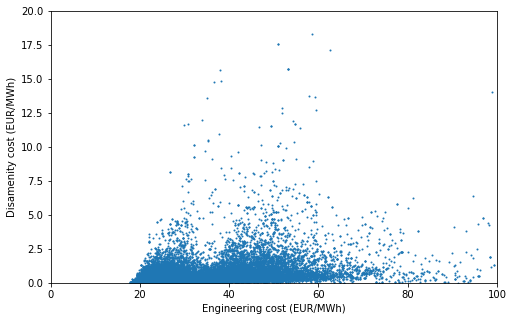

In [22]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)

(0.0, 20.0)

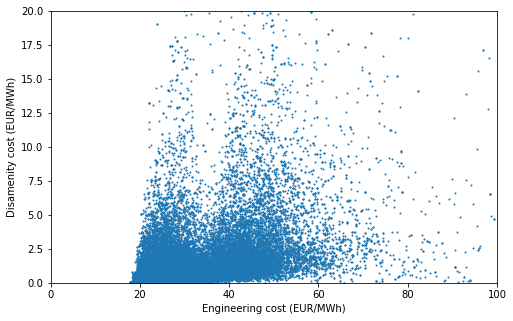

In [8]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)

In [23]:
turbines['disamenity'].mean()

0.41609152143868344

In [9]:
turbines['disamenity'].mean()

1.5401632946903399